**Loan_ID**: Unique identification number or code assigned to each loan application.

**Gender**: The gender of the loan applicant, typically categorized as male, female.

**Married**: Indicates whether the applicant is married or not (Yes/No).

**Dependents**: Number of dependents (e.g., children, elderly parents) the applicant has.

**Education**: Level of education attained by the applicant (Graduate/Not Graduate).

**Self_Employed**: Denotes if the applicant is self-employed (Yes/No).

**ApplicantIncome**: The income of the primary applicant.

**CoapplicantIncome**: The income of the co-applicant (if any).

**LoanAmount**: The amount of the loan applied for by the applicant.

**Loan_Amount_Term**: The period or duration for which the loan has been applied

**Credit_History**: Indicates the credit history of the applicant (e.g., 1 denotes a good credit history, 0 denotes otherwise).

**Property_Area**: The area where the property for which the loan is being applied is located (e.g., Urban, Semiurban, Rural).

**Loan_Status**: Denotes whether the loan application was approved or not (Y/N).

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [140]:
# Importing the dataset using pandas
df = pd.read_csv("loan_status.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [141]:
# Number of rows and columns of our dataset
df.shape

(614, 13)

In [142]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [143]:
# Number of missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [144]:
# Dropping the missing values
df = df.dropna(axis=0)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [145]:
df['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [146]:
# The majority of our dataset consists of males.

C:\Users\legion\AppData\Local\Temp\ipykernel_6496\221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


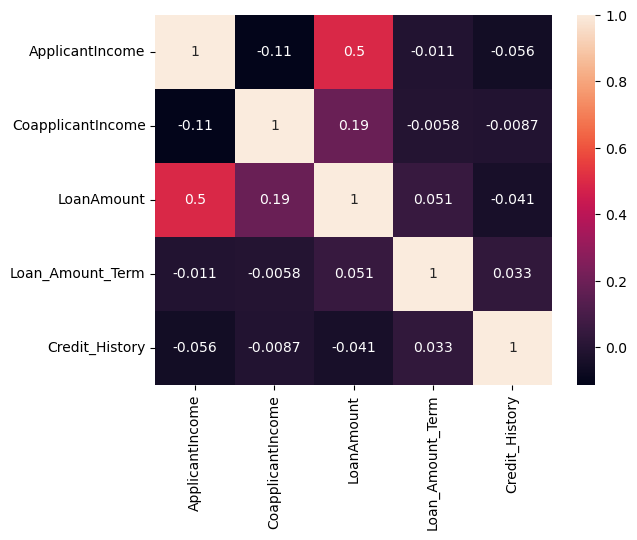

In [147]:
sns.heatmap(df.corr(), annot=True)
plt.show()

We can observe a substantial correlation between **ApplicantIncome** and **LoanAmount**.

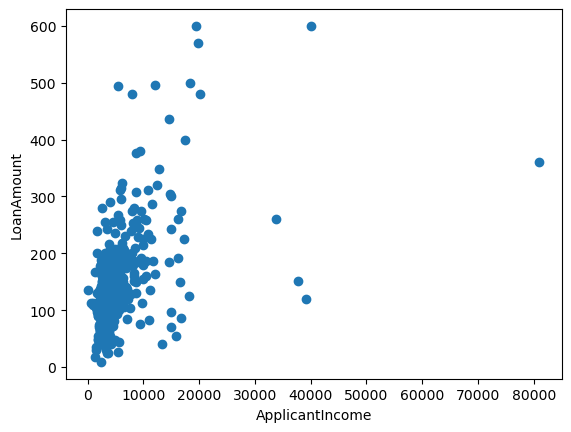

In [148]:
x = df['ApplicantIncome']
y = df['LoanAmount']
plt.scatter(x, y)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

As the figure indicates, larger loan amounts are not requested only by individuals with higher ApplicantIncome.

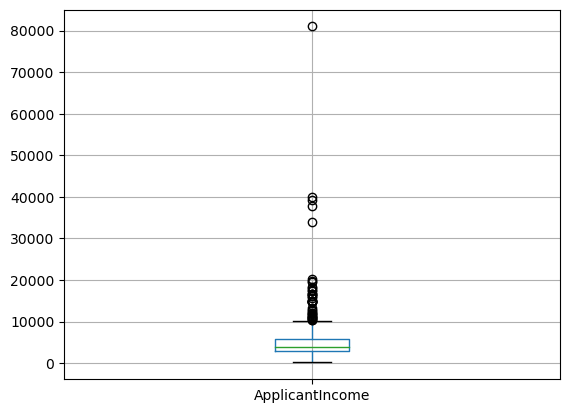

In [149]:
df.boxplot(column='ApplicantIncome')
plt.show()

We have numerous outliers in the ApplicantIncome data. Let's delve deeper into the details of this boxplot.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

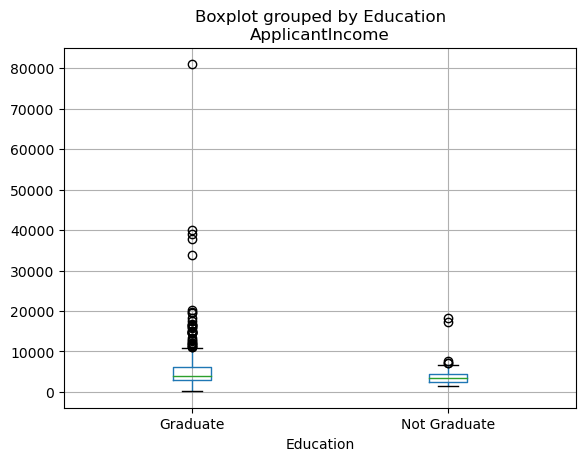

In [150]:
df.boxplot(column='ApplicantIncome', by='Education')

In [151]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

The distribution across the population reveals diverse education levels, leading to outliers in both categories. Notably, the **Graduated** category has the greatest number of outliers, which is expected as Graduated individuals represent the majority in our dataset.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Married'>

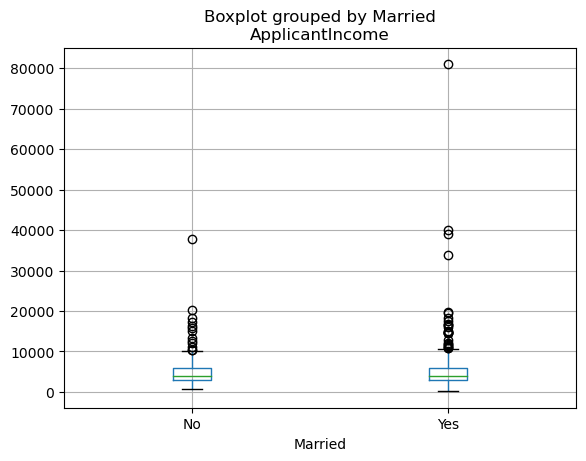

In [152]:
df.boxplot(column='ApplicantIncome', by='Married')

In [153]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

Also the **married** category exhibits the highest number of outliers in ApplicantIncome because they represent the majority in our dataset.

In [154]:
# label encoding
df.replace({"Loan_Status" : {"N":0, "Y": 1}}, inplace=True)

C:\Users\legion\AppData\Local\Temp\ipykernel_6496\1170444320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status" : {"N":0, "Y": 1}}, inplace=True)


In [155]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


### Data pre-processing

In [156]:
# Dependents column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [157]:
# replacing the value of 3+ to 3
df = df.replace(to_replace='3+', value=3)
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

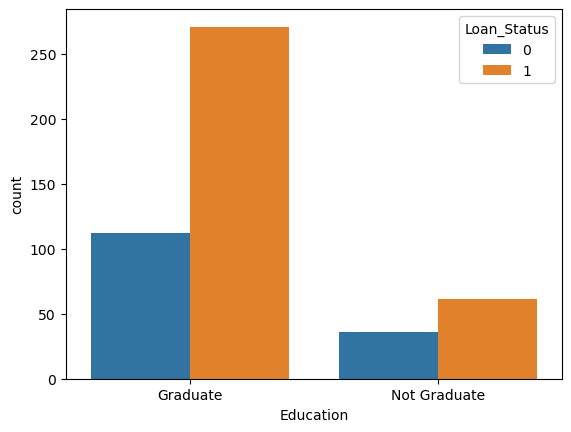

In [158]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

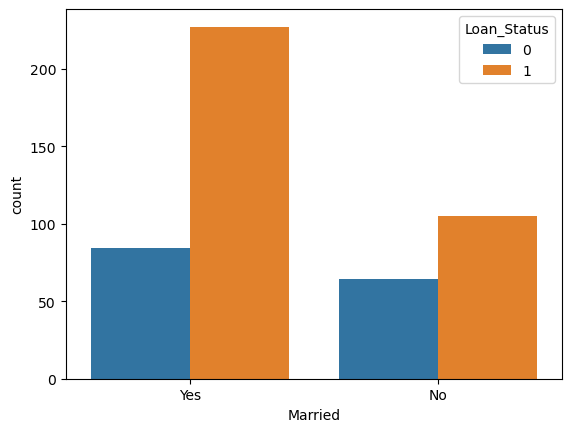

In [159]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

In [160]:
# convert categorical columns to numerical values
df.replace({ "Married": {"No":0, "Yes": 1}, "Education": {"Not Graduate":0,"Graduate": 1}, "Gender": {"Male":1, "Female": 0},
            "Self_Employed": {"No":0, "Yes": 1}, "Property_Area": {"Rural":0, "Semiurban": 1 , "Urban": 2}}, inplace=True)

In [161]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] != 0, np.log(df['ApplicantIncome']), 0)
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] != 0, np.log(df['CoapplicantIncome']), 0)
df['LoanAmount'] = np.where(df['LoanAmount'] != 0, np.log(df['LoanAmount']), 0)
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] != 0, np.log(df['Loan_Amount_Term']), 0)

C:\Users\legion\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [162]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,8.430109,7.318540,4.852030,5.886104,1.0,0,0
2,LP001005,1,1,0,1,1,8.006368,0.000000,4.189655,5.886104,1.0,2,1
3,LP001006,1,1,0,0,0,7.856707,7.765569,4.787492,5.886104,1.0,2,1
4,LP001008,1,0,0,1,0,8.699515,0.000000,4.948760,5.886104,1.0,2,1
5,LP001011,1,1,2,1,1,8.597297,8.341887,5.587249,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,7.972466,0.000000,4.262680,5.886104,1.0,0,1
610,LP002979,1,1,3,1,0,8.320205,0.000000,3.688879,5.192957,1.0,0,1
611,LP002983,1,1,1,1,0,8.996157,5.480639,5.533389,5.886104,1.0,2,1
612,LP002984,1,1,2,1,0,8.933664,0.000000,5.231109,5.886104,1.0,2,1


In [163]:
# Seperating the data and label
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [164]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,8.430109,7.318540,4.852030,5.886104,1.0,0
2,1,1,0,1,1,8.006368,0.000000,4.189655,5.886104,1.0,2
3,1,1,0,0,0,7.856707,7.765569,4.787492,5.886104,1.0,2
4,1,0,0,1,0,8.699515,0.000000,4.948760,5.886104,1.0,2
5,1,1,2,1,1,8.597297,8.341887,5.587249,5.886104,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,0.000000,4.262680,5.886104,1.0,0
610,1,1,3,1,0,8.320205,0.000000,3.688879,5.192957,1.0,0
611,1,1,1,1,0,8.996157,5.480639,5.533389,5.886104,1.0,2
612,1,1,2,1,0,8.933664,0.000000,5.231109,5.886104,1.0,2


In [165]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### Training and Test data

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


### Training the model

#### Support Vector Machine model

In [167]:
classifier = svm.SVC(kernel='linear')

In [168]:
# training the Support Vector Machine model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

#### Model Evaluation

In [169]:
# Accuracy score on training data
X_train_prediction = classifier.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [170]:
print('Accuracy on training data : ', train_data_accuracy)

Accuracy on training data :  0.8055555555555556


In [171]:
# Accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [172]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8333333333333334
